In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor as rfr 
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Distribution of Charges')

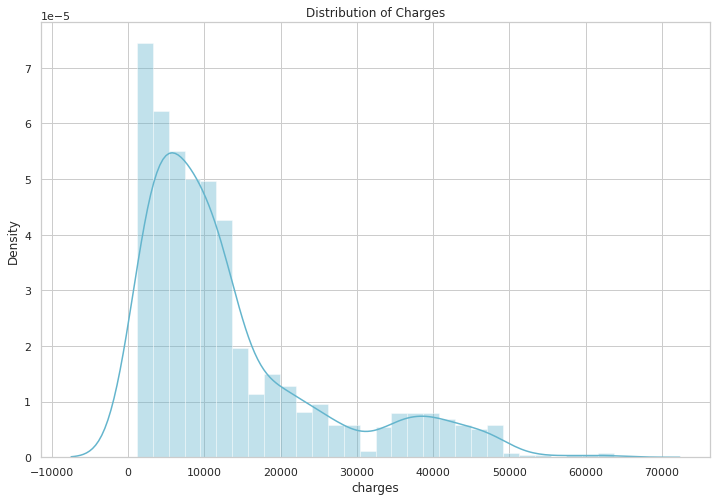

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

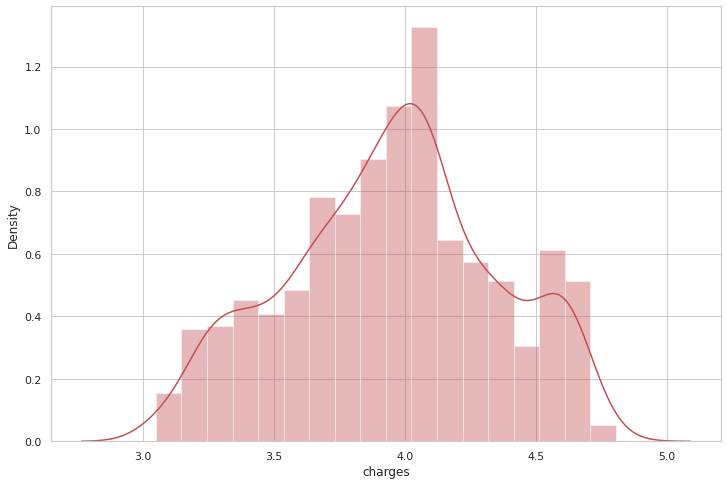

In [ ]:
f, ax = plt.subplots(1 ,1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r')

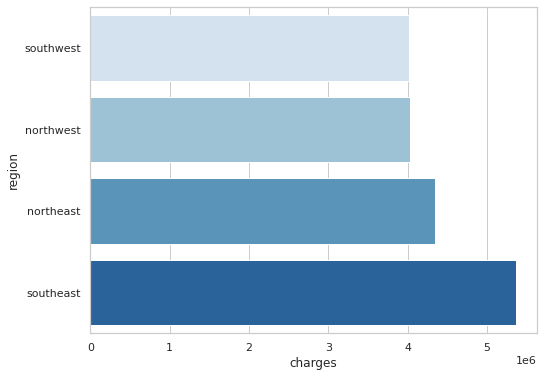

In [ ]:
#charges by region
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f , ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

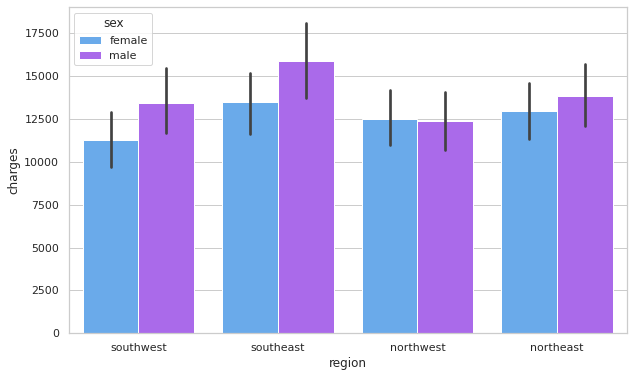

In [ ]:
#sex,smoking,childern changes by region
f,ax = plt.subplots(1,1,figsize=(10,6))
ax = sns.barplot(x='region', y='charges',hue='sex',data=df,palette='cool')

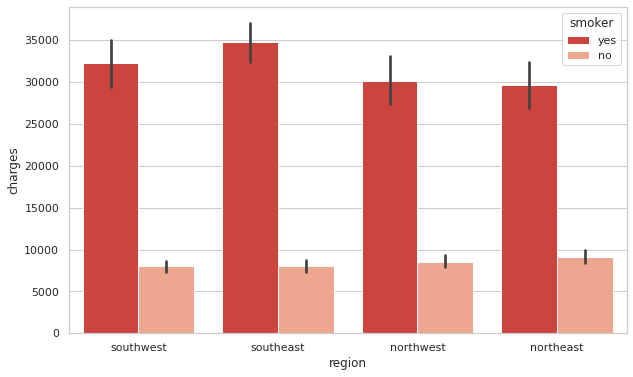

In [ ]:
f,ax = plt.subplots(1,1,figsize=(10,6))
ax = sns.barplot(x='region',y='charges',hue='smoker',data=df,palette='Reds_r')

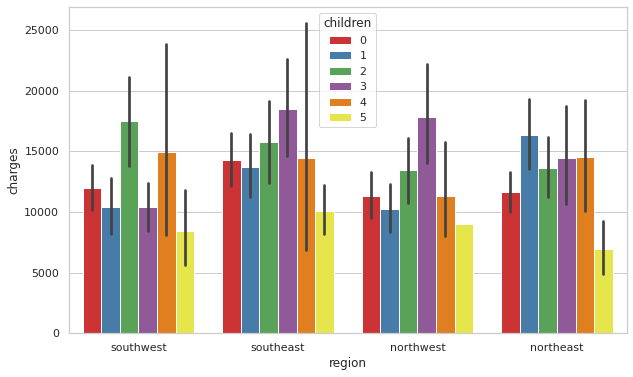

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

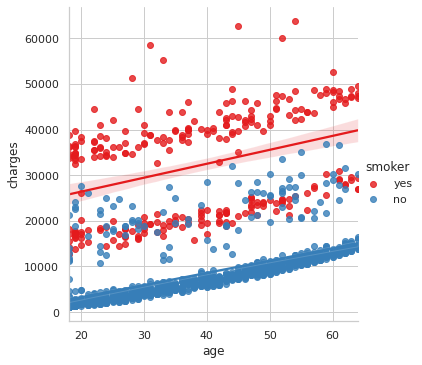

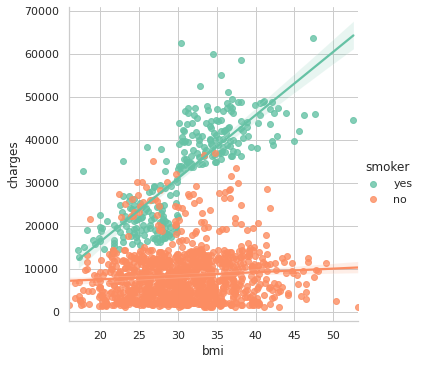

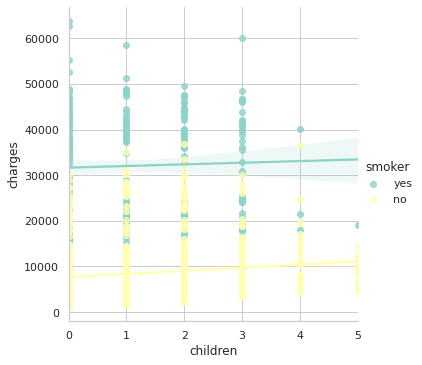

In [ ]:
#the medical charges by age, bmi and children according to the smoking factor
ax = sns.lmplot(x = 'age', y= 'charges', data=df, hue= 'smoker',palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

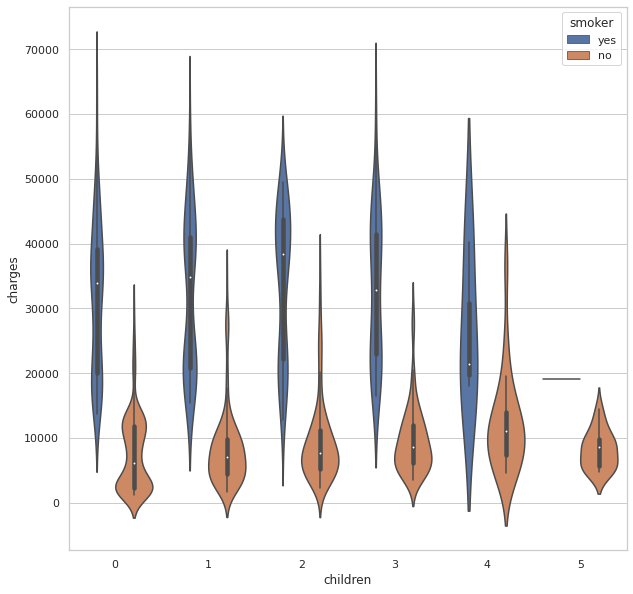

In [ ]:
f,ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,hue='smoker' )

In [ ]:
#Converting objects labels into categorical
df[['sex','smoker','region']] = df[['sex','smoker','region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
#Converting category labels into numerical using LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

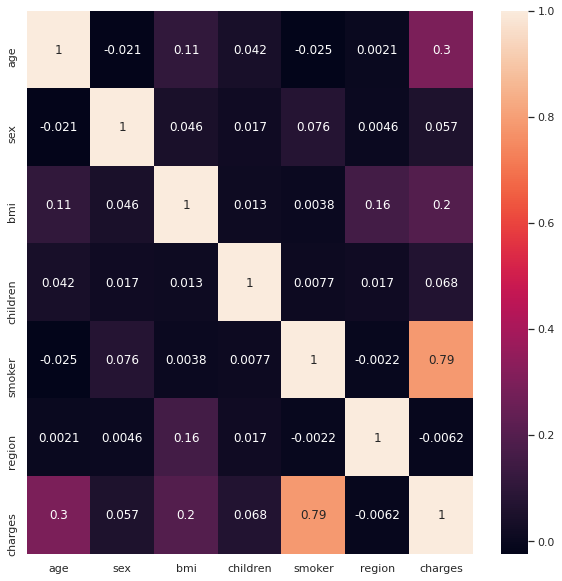

In [ ]:
f,ax = plt.subplots(1,1, figsize=(10,10))
ax = sns.heatmap(df.corr(), annot=True)

# **Multiple Regression**

In [ ]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.983908824413
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


In [ ]:
# Model Evaluation

y_train_predict = Lin_reg.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set:")
print("\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = Lin_reg.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set:")
print("\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:


RMSE is 6142.440924408568
R2 score is 0.7368306228430945


The model performance for testing set:


RMSE is 5643.219748880902
R2 score is 0.7998747145449959


In [ ]:
predictions = Lin_reg.predict(x_test)


In [ ]:
predictions

array([ 1.10172305e+04,  9.78753017e+03,  3.79947821e+04,  1.61227784e+04,
        6.93075923e+03,  3.96902046e+03,  1.55178430e+03,  1.42832091e+04,
        8.95342886e+03,  7.43194558e+03,  4.54457668e+03,  1.02472753e+04,
        8.65710757e+03,  4.12619770e+03,  2.78113171e+04,  1.10395971e+04,
        1.12514458e+04,  6.03101003e+03,  8.17339252e+03,  2.70394424e+04,
        3.35778484e+04,  1.42670864e+04,  1.16850232e+04,  3.24069403e+04,
        4.41465153e+03,  9.14607182e+03,  1.12786921e+03,  1.00891473e+04,
        4.08782973e+03,  1.03569127e+04,  8.96224058e+03,  4.02452861e+04,
        1.54779185e+04,  1.36671353e+04,  2.47415217e+04,  5.13005676e+03,
        1.28428861e+04,  3.05264017e+04,  3.34289155e+04,  3.48813457e+03,
        4.00215674e+03,  4.27800724e+03,  3.04613664e+04,  3.93491672e+04,
        2.80033682e+04,  5.00299253e+03,  1.09312243e+04,  7.77848493e+03,
        3.60829639e+03,  1.05573586e+04,  5.62958594e+03,  3.37882569e+03,
        3.28476568e+04,  

# **Random Forest Regressor**

In [ ]:
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)
y_train = np.array(y_train)
x_train_pred = np.array(x_train_pred)
x_train_pred.reshape(-1,1)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

MSE train data: 3630549.354, MSE test data: 19737210.132
R2 train data: 0.971, R2 test data: 0.877


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 test_data: ', round(r2_score(y_test,predictions), 2))

MAE: 3930.3332739011403
MSE: 31845929.134159435
RMSE: 5643.219748880902
R2 test_data:  0.8


# **MLR with PCA**

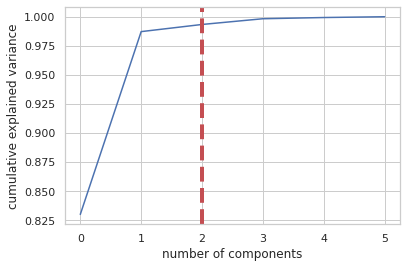

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.830001,0.830001
1,0.987210,0.157209
2,0.993361,0.006151
3,0.998284,0.004923
4,0.999329,0.001045
5,1.000000,0.000671


In [ ]:
pca_test = PCA(n_components=6)
pca_test.fit(x_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=2, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(6))

In [ ]:
pca = PCA(n_components=6)
pca.fit(x_train)
X_train_pca = pca.transform(x_train)
X_test__pca = pca.transform(x_test)

In [ ]:
columns=['age','sex','bmi','children','smoker','region']

In [ ]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_,columns=columns, index=pca_dims)
pca_test_df.head(6).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5
age,0.998143,-0.060640,-0.003878,-0.004026,0.001094,0.001389
sex,-0.000662,0.003208,0.013679,0.005135,0.993406,-0.113669
bmi,0.060690,0.997760,-0.009067,0.026423,-0.003077,0.001016
children,0.004876,0.002615,0.974610,0.223068,-0.015711,-0.009896
smoker,-0.001470,-0.000848,0.008854,0.013421,0.113480,0.993409
region,-0.001386,0.027913,0.223097,-0.974330,0.003114,0.010841


In [ ]:
LR = LinearRegression()
LR.fit(X_train_pca, y_train)
 
print(LR.score(X_train_pca, y_train))


0.7368306228430945


In [ ]:
print(pca_test.explained_variance_ratio_)

[8.30000912e-01 1.57209270e-01 6.15082910e-03 4.92274538e-03
 1.04484412e-03 6.71399156e-04]


Text(0, 0.5, 'Predicted Y')

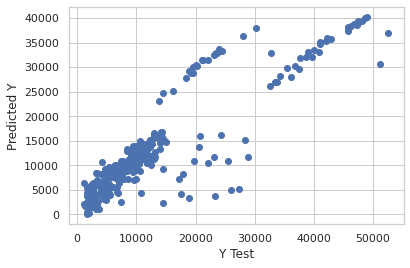

In [ ]:
plt.scatter(y_test,y_test_predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# **RFR with PCA**

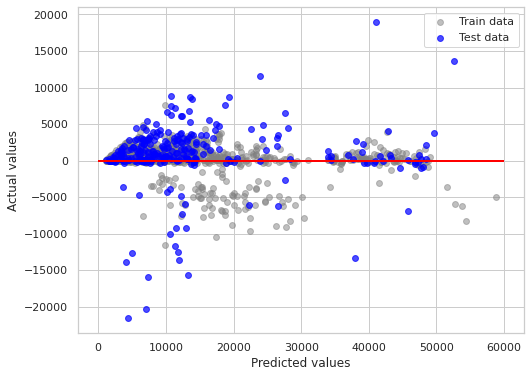

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

# features

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218751)
3.age(0.136942)
4.children(0.021042)
5.region(0.015209)
6.sex(0.006377)


<BarContainer object of 6 artists>

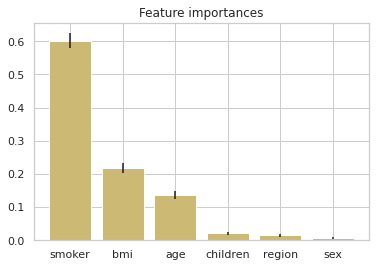

In [ ]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predict})
df

,Actual,Predicted
578,9724.53000,11017.230479
610,8547.69130,9787.530168
569,45702.02235,37994.782118
1034,12950.07120,16122.778407
198,9644.25250,6930.759230
...,...,...
1084,15019.76005,14699.098767
726,6664.68595,8210.854549
1132,20709.02034,16019.284542
725,40932.42950,33104.944084


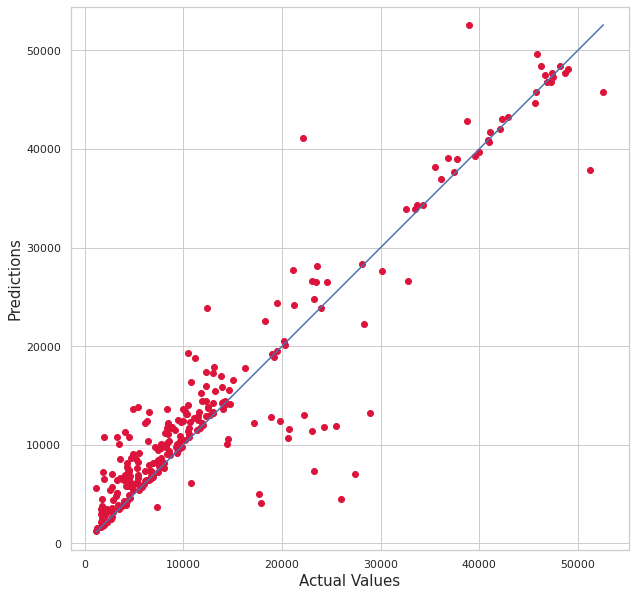

In [ ]:
# Plot predicted vs actual results of best model
pred = Rfr.predict(x_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='crimson')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()